In [166]:
%reset
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib notebook
%matplotlib inline


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [167]:
import sqlite3

con = sqlite3.connect("rssi.sqlite")
df = pd.read_sql_query("SELECT homepi, upylounge, upybedroom, location from rssi where homepi is not null and upylounge is not null and upybedroom is not null", con)

In [168]:
df.head()

,homepi,upylounge,upybedroom,location
0,-70,-80,-84,lounge
1,-69,-80,-84,lounge
2,-69,-80,-84,lounge
3,-69,-80,-84,lounge
4,-69,-80,-84,lounge


In [169]:
colors = {'lounge' : 'b',
          'bedroom' : 'r' 
         }

c = [colors[val] for val in df.location]

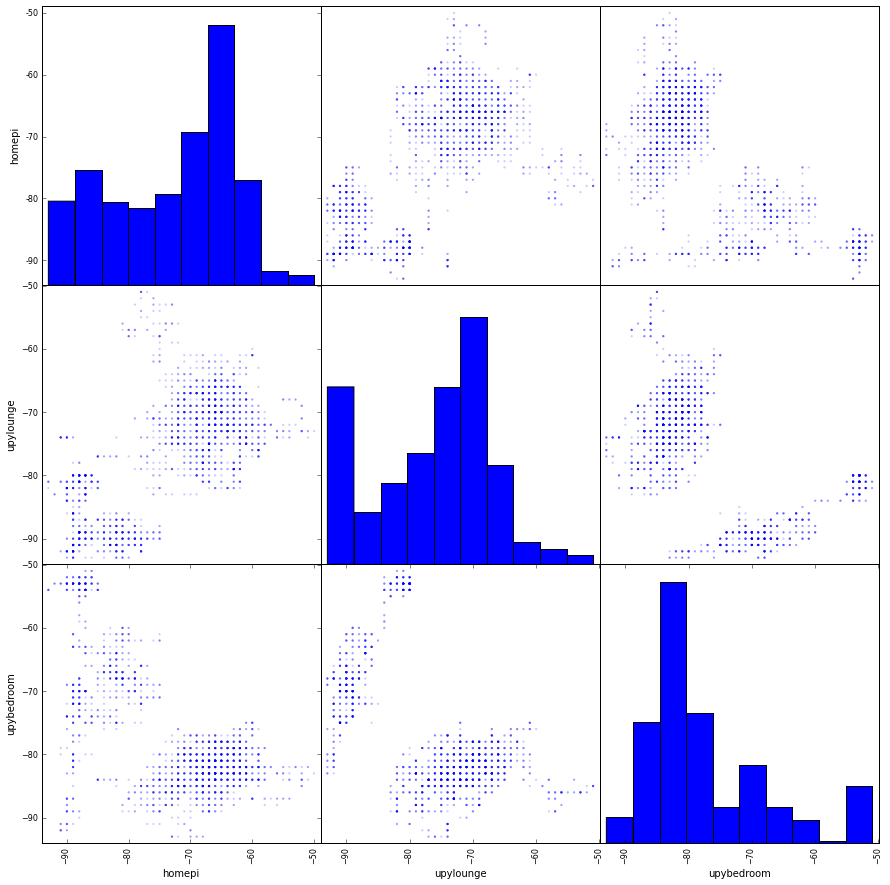

In [170]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='hist')

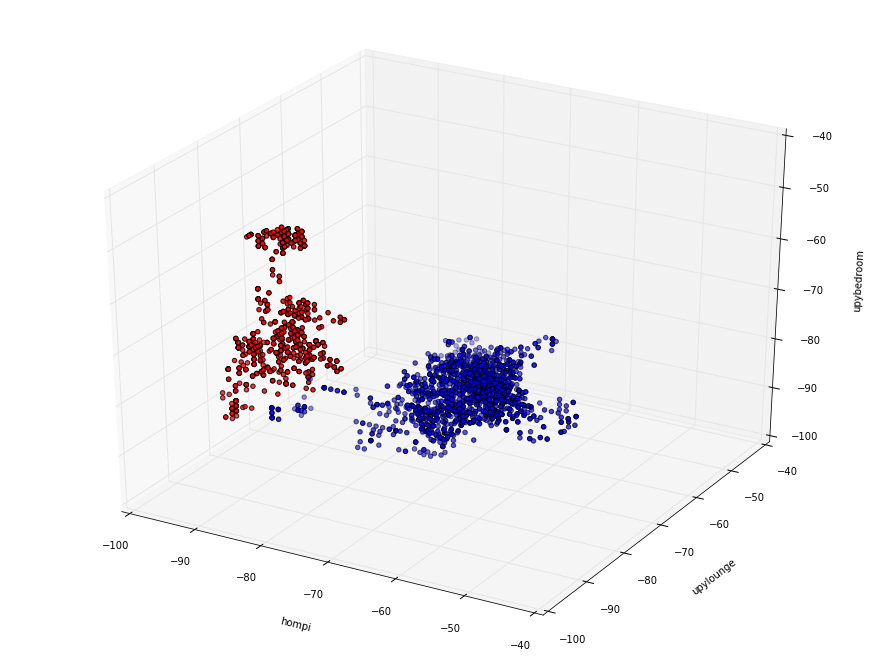

In [171]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df.homepi, df.upylounge, df.upybedroom, c=c)
ax.set_xlabel('hompi')
ax.set_ylabel('upylounge')
ax.set_zlabel('upybedroom')
ax.legend()


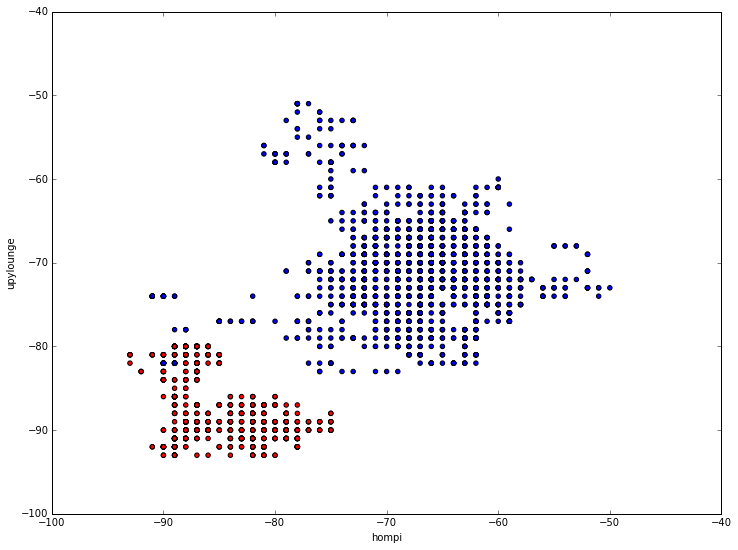

In [172]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(df.homepi, df.upylounge, c=c)
ax.set_xlabel('hompi')
ax.set_ylabel('upylounge')
ax.legend()

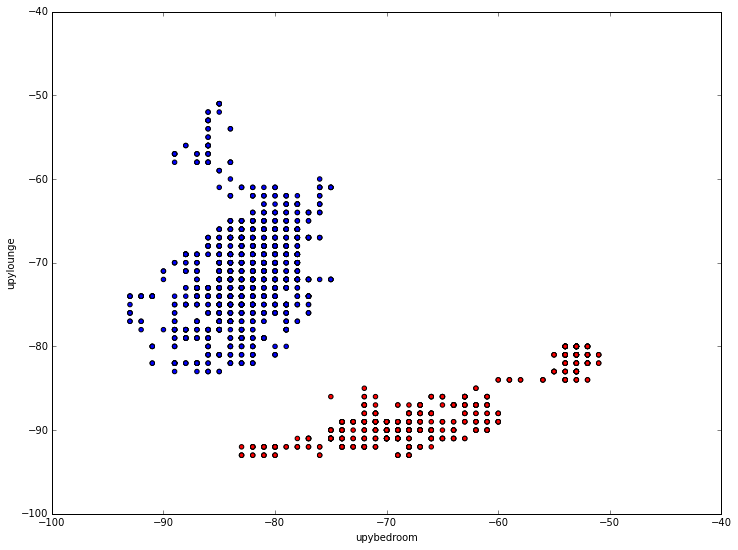

In [173]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(df.upybedroom, df.upylounge, c=c)
ax.set_xlabel('upybedroom')
ax.set_ylabel('upylounge')
ax.legend()

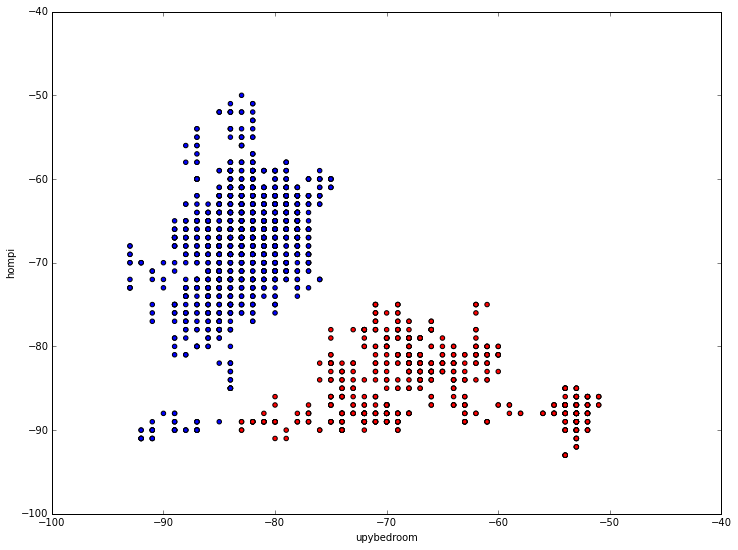

In [174]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(df.upybedroom, df.homepi, c=c)
ax.set_xlabel('upybedroom')
ax.set_ylabel('hompi')
ax.legend()

# Machine learning

In [175]:
X = df[['homepi', 'upylounge', 'upybedroom']]
y = df['location']
#rssi = (-85, -85, -85) # folded arms
rssi = (-70, -75, -80)  # lounge

## Support Vector Machine

In [176]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=.25, random_state=101, probability=True)

In [177]:
svm.fit(X, y)

SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=101,
  shrinking=True, tol=0.001, verbose=False)

In [178]:
rssi = (-85, -85, -80) # folded arms
print(svm.predict(rssi))
print(svm.predict_proba(rssi))  # Order is alphabetical: bedroom, lounge

[u'bedroom']
[[ 0.60675672  0.39324328]]


## KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)

In [180]:
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=7, p=2, weights='uniform')

In [181]:
neigh.kneighbors(rssi)

(array([[ 6.4807407 ,  7.        ,  7.        ,  7.14142843,  7.14142843,
          7.14142843,  7.14142843]]),
 array([[2128, 2028, 2022, 1800, 1802, 1801, 1797]]))

In [182]:
rssi = (-85, -85, -83) # folded arms
print(neigh.predict(rssi))
print(neigh.predict_proba(rssi))

[u'lounge']
[[ 0.  1.]]
